# House Prices: Advanced Regression Techniques
Kaggle : Predict sales prices and practice feature engineering, RFs, and gradient boosting

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Dataset load

In [2]:
houseData = pd.read_csv('house-pr/train.csv')
houseData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
houseData.describe().iloc[0]

Id               1460.0
MSSubClass       1460.0
LotFrontage      1201.0
LotArea          1460.0
OverallQual      1460.0
OverallCond      1460.0
YearBuilt        1460.0
YearRemodAdd     1460.0
MasVnrArea       1452.0
BsmtFinSF1       1460.0
BsmtFinSF2       1460.0
BsmtUnfSF        1460.0
TotalBsmtSF      1460.0
1stFlrSF         1460.0
2ndFlrSF         1460.0
LowQualFinSF     1460.0
GrLivArea        1460.0
BsmtFullBath     1460.0
BsmtHalfBath     1460.0
FullBath         1460.0
HalfBath         1460.0
BedroomAbvGr     1460.0
KitchenAbvGr     1460.0
TotRmsAbvGrd     1460.0
Fireplaces       1460.0
GarageYrBlt      1379.0
GarageCars       1460.0
GarageArea       1460.0
WoodDeckSF       1460.0
OpenPorchSF      1460.0
EnclosedPorch    1460.0
3SsnPorch        1460.0
ScreenPorch      1460.0
PoolArea         1460.0
MiscVal          1460.0
MoSold           1460.0
YrSold           1460.0
SalePrice        1460.0
Name: count, dtype: float64

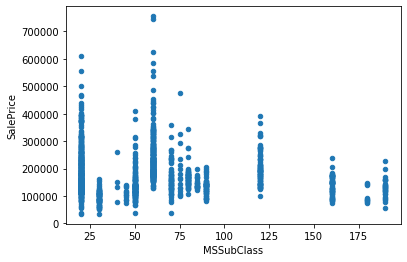

In [4]:
houseData.plot.scatter(x='MSSubClass',y='SalePrice')

In [5]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Preprocess

In [6]:
#drop non-important features which doesnt affect prediction by having similar values in all records or having large numbers of NA
houseData = houseData.drop(columns=['Utilities','LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Street'])


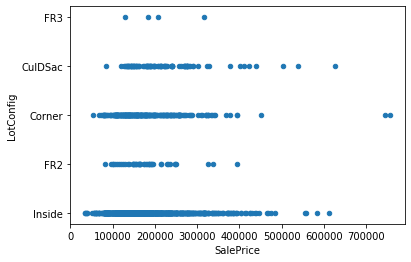

In [17]:

houseData.plot.scatter(x='SalePrice',y='LotConfig')

In [12]:
houseData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       

In [11]:
from sklearn import preprocessing
from pandas.api.types import is_string_dtype

le = preprocessing.LabelEncoder()
features_to_apply = ['MSZoning', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType',
       'SaleCondition']
houseData = houseData.fillna('')
le.fit_transform(houseData)

ValueError: bad input shape (1460, 73)

## Train and Test Split

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(houseData.iloc[:,:-1],houseData['SalePrice'],test_size=0.25)

In [25]:
x_train,x_test,y_train,y_test

(        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 391    392          60       RL         71.0    12209   Pave   NaN      IR1   
 1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
 254    255          20       RL         70.0     8400   Pave   NaN      Reg   
 668    669          20       RL          NaN    14175   Pave   NaN      Reg   
 436    437          50       RM         40.0     4400   Pave   NaN      Reg   
 ...    ...         ...      ...          ...      ...    ...   ...      ...   
 689    690         120       RL         61.0     7577   Pave   NaN      IR1   
 294    295          20       RL         80.0     9600   Pave   NaN      Reg   
 467    468          70       RL         79.0     9480   Pave   NaN      Reg   
 710    711          30       RL         56.0     4130   Pave   NaN      IR1   
 771    772          20       RL         67.0     8877   Pave   NaN      Reg   
 
      LandContour Utilities  ... Scree

## Model Creation and Training

In [26]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
linearReg.fit(x_train,y_train)

from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor()
RandomForest.fit(x_train,y_train)

ValueError: could not convert string to float: 'RL'